In [20]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 76.6 MB 18.5 MB/s            
     |████████████████████████████████| 15.2 MB 21.6 MB/s            
     |████████████████████████████████| 11.8 MB 18.7 MB/s            
     |████████████████████████████████| 47 kB 5.9 MB/s             
     |████████████████████████████████| 3.2 MB 14.7 MB/s            
     |████████████████████████████████| 296 kB 78.0 MB/s            
     |████████████████████████████████| 959 kB 21.3 MB/s            
     |████████████████████████████████| 1.6 MB 29.5 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 255.9 MB 108.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import sklearn
import catboost
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

In [2]:
data = pd.read_csv('unzip/FINAL_TARGETS_DATES_TRAINTEST.tsv', sep= '\t')
unique_hash = pd.read_csv('unique_hash_200.csv')
test_id = pd.read_csv('test0.tsv')

In [3]:
data['RETRO_DT_Т'] = pd.to_datetime(data['RETRO_DT'], format = '%Y%m%d')
data['year'] = data['RETRO_DT_Т'] .dt.year
data['month'] = data['RETRO_DT_Т'] .dt.month
data['week']= data['RETRO_DT_Т'].dt.week
data['day'] = data['RETRO_DT_Т'].dt.day
data['dayofweek'] = data['RETRO_DT_Т'].dt.dayofweek
data = data.drop('RETRO_DT_Т', axis =1)
data.head()

/tmp/ipykernel_18123/675448631.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week']= data['RETRO_DT_Т'].dt.week


,CLIENT_ID,RETRO_DT,TARGET,year,month,week,day,dayofweek
0,1011725,20210501,0,2021,5,17,1,5
1,1018784,20210501,1,2021,5,17,1,5
2,1021812,20210501,0,2021,5,17,1,5
3,1024003,20210501,0,2021,5,17,1,5
4,1025140,20210501,test,2021,5,17,1,5


In [4]:
unique_hash = pd.read_csv('unique_hash_200.csv')
d_hash = data.merge(unique_hash, on= 'CLIENT_ID', how='left')
print(f'В датасете hash ничего неизвестно про {d_hash[d_hash.index.isin(test_id)].isna().sum()[4]} тестовых клиента')
print(f'В датасете hash ничего неизвестно про {d_hash[d_hash.TARGET!="test"].isna().sum()[4]} train клиента')

В датасете hash ничего неизвестно про 0.0 тестовых клиента
В датасете hash ничего неизвестно про 0 train клиента


In [5]:
d_hash = d_hash.fillna(0)
d_hash.head()

,CLIENT_ID,RETRO_DT,TARGET,year,month,week,day,dayofweek,'eb727f972742f7ff6b07ee761ae5da1b','c82c51bc925071ff17983d79b472c9f8',...,'09a5d8163c515679ed8af3ed9bce9781','62583b1fb97c680729968a72699f6a87','5d91dec10f79029a60c812c3d1b9fde1','d960e2a8aeeb1981454e5f9deb212eca','11b5b745d95ec1fffc84ff66ec7a6ac1','3b6bc60ca179e3ed9199e6d42e8a591a','6ddc611274ba69b7aabe25440f9507df','1f8b04d2d2e7384a26a8c68fd530e732','2e0ece452e8cd8d76e9433fb680b9831','be04cee85f8fcac172e31087a4cfe9a4'
0,1011725,20210501,0,2021,5,17,1,5,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1018784,20210501,1,2021,5,17,1,5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1021812,20210501,0,2021,5,17,1,5,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1024003,20210501,0,2021,5,17,1,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1025140,20210501,test,2021,5,17,1,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Нормализуем данные

df_my_resСоздадим дф с резами и предсказаниями

In [6]:
params = ['mod','score','name','df' 'eval_metric', 'boosting_type','iterations', 'depth', 'loss_function', 'learning_rate', 'score_function', 'csv_model']
df_my_res = pd.read_csv('res_all.csv')
# df_my_res = pd.DataFrame(columns =params )
df_my_res[-7:]

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
21,CatBoost,0.648509,data_all,AUC,Plain,3000,5,Logloss,0.02,Cosine,CatBoost_3000_0.02_5
22,CatBoost,0.648509,data_all,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5
23,CatBoost,0.648509,data_all,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5
24,CatBoost,0.648509,data_all_LL,AUC,Plain,3000,5,Logloss,0.02,Cosine,CatBoost_3000_0.02_5
25,CatBoost,0.648509,data_all_CrossEntropy,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5
26,CatBoost,0.648509,data_all_CrossEntropy,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5
27,CatBoost,0.648938,data_all_MultiClassOneVsAll,AUC,Plain,3000,5,MultiClassOneVsAll,0.02,Cosine,CatBoost_3000_0.02_5


Разделим на train test 

In [25]:
def cb_fit_predict(df,name,n_est, learning_rate, depth,eval_metric = 'AUC', boosting_type = 'Plain',loss_function='MultiClass', score_function='Cosine'):    
    train = df[df.TARGET != 'test']
    test = df[df.TARGET == 'test'].drop(['TARGET'], axis =1)
    # test = test
    # print(test.columns)
    X_train = train.drop(['TARGET'], axis = 1)
    Y_train = pd.DataFrame(train['TARGET'])
    
    
    x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=1337)
    x, x_v, y, y_v = train_test_split(x_train, y_train, test_size=0.1, random_state=1337)
    model = CatBoostClassifier(n_estimators = n_est, learning_rate = learning_rate, depth = depth, eval_metric = eval_metric, boosting_type = boosting_type, loss_function=loss_function, score_function=score_function, random_seed = 1337)
    model.fit(x.values,y.values,eval_set=(x_v.values,y_v.values), verbose = False)
    pred = model.predict_proba(x_validation.values)
    roc = roc_auc_score(y_validation, pred[:, 1])
    mod ='CatBoost'
    
    X_test =  test
    pred = model.predict_proba(X_test.values)
    col = test[['CLIENT_ID']].reset_index(drop = 'True')

    d = pd.DataFrame(pred[:, 1], columns=['TARGET'])
    d = col.join(d, how = 'right')
    d.to_csv(f'sasha1/{mod}_{n_est}_{name}_{learning_rate}_{depth}.csv', index = False)
    
    df_my_res.loc[len(df_my_res)] = [mod, roc, name, eval_metric, boosting_type, n_est, depth, loss_function, learning_rate, score_function, f'{mod}_{n_est}_{learning_rate}_{depth}']
    df_my_res.to_csv('res_all.csv', index = False)
    model.save_model(f'sasha1/{mod}_{n_est}_{name}_{learning_rate}_{depth}.cbm')

    
    # print(f'{mod}: n_est={n_est}, l_r={learning_rate}, depth={depth}\nvalid:{roc}\ncsv_name: {mod}_{n_est}_{learning_rate}_{depth}.csv')
    return model

Функция cb_fit_predict запускает CatBoost на введенных данных (объединенный train и test) с заданными параметрами
Сохраняет модель и предсказание, выводит данные и результаты, а так же заносит все это в df
Возвращает модель

In [10]:
model = cb_fit_predict(d_hash, 'd_hash', 1500, 0.02,4) 
df_my_res

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
8,CatBoost,0.645437,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
9,CatBoost,0.651665,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
10,CatBoost,0.651665,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
11,CatBoost,0.645849,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
12,CatBoost,0.646293,data_all_fft_stat,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
13,CatBoost,0.646293,d_all_fft_stat,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
14,CatBoost,0.647646,d_all_fft_stat,AUC,Plain,2000,5,MultiClass,0.02,Cosine,CatBoost_2000_0.02_5
15,CatBoost,0.649097,d_all_fft_stat,AUC,Plain,3000,5,MultiClass,0.02,Cosine,CatBoost_3000_0.02_5
16,CatBoost,0.650326,d_all_fft_stat,AUC,Plain,5000,5,MultiClass,0.02,Cosine,CatBoost_5000_0.02_5
17,CatBoost,0.650662,d_all_fft_stat,AUC,Plain,10000,5,MultiClass,0.02,Cosine,CatBoost_10000_0.02_5


In [11]:
fft_stat = (pd.read_csv('fft_stat.tsv')).drop('Unnamed: 0', axis = 1)
fft_stat = d_hash.merge(fft_stat, on= 'CLIENT_ID', how='left').fillna(0)
fft_stat.head(2)

,CLIENT_ID,RETRO_DT,TARGET,year,month,week,day,dayofweek,'eb727f972742f7ff6b07ee761ae5da1b','c82c51bc925071ff17983d79b472c9f8',...,'2e0ece452e8cd8d76e9433fb680b9831','be04cee85f8fcac172e31087a4cfe9a4',count,mean,std,min,25%,50%,75%,max
0,1011725,20210501,0,2021,5,17,1,5,1.0,0.0,...,0.0,0.0,1015.0,1127.778325,31769.539622,0.0,0.0,0.0,0.0,1011725.0
1,1018784,20210501,1,2021,5,17,1,5,0.0,0.0,...,0.0,0.0,1015.0,2296.910345,34420.059813,0.0,0.0,0.0,0.0,1018784.0


In [12]:
client_target_nof = (pd.read_csv('client_target_nof.tsv')).drop('Unnamed: 0', axis = 1)
client_target_nof = d_hash.merge(client_target_nof.drop(['RETRO_DT', 'TARGET'], axis = 1), on= 'CLIENT_ID', how='left').fillna(0)
client_target_nof.head(2)

,CLIENT_ID,RETRO_DT,TARGET,year,month,week,day,dayofweek,'eb727f972742f7ff6b07ee761ae5da1b','c82c51bc925071ff17983d79b472c9f8',...,'62583b1fb97c680729968a72699f6a87','5d91dec10f79029a60c812c3d1b9fde1','d960e2a8aeeb1981454e5f9deb212eca','11b5b745d95ec1fffc84ff66ec7a6ac1','3b6bc60ca179e3ed9199e6d42e8a591a','6ddc611274ba69b7aabe25440f9507df','1f8b04d2d2e7384a26a8c68fd530e732','2e0ece452e8cd8d76e9433fb680b9831','be04cee85f8fcac172e31087a4cfe9a4',number_of_friends
0,1011725,20210501,0,2021,5,17,1,5,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0
1,1018784,20210501,1,2021,5,17,1,5,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0


In [84]:
cb_fit_predict(d_hash,'d_hash', 1500, 0.02,4)
cb_fit_predict(fft_stat,'fft_stat', 1500, 0.02,4)  
cb_fit_predict(client_target_nof,'client_target_nof', 1500, 0.02,4)  


31858
31858
31858


,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
8,CatBoost,0.618580,d_hash,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
1,CatBoost,0.618580,d_hash,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
2,CatBoost,0.618580,d_hash,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
3,CatBoost,0.618580,fft_stat,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
4,CatBoost,0.618580,client_target_nof,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
5,CatBoost,0.618580,d_hash,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
6,CatBoost,0.619432,fft_stat,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
7,CatBoost,0.618375,client_target_nof,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4


In [13]:
IU200 = (pd.read_csv('top_200_i_and_u_ID.csv'))
IU200 = d_hash.merge(IU200, on= 'CLIENT_ID', how='left').fillna(0)
IU200.head(2)

,CLIENT_ID,RETRO_DT,TARGET,year,month,week,day,dayofweek,'eb727f972742f7ff6b07ee761ae5da1b','c82c51bc925071ff17983d79b472c9f8',...,u6=2,u7=0,u7=1,u7=1.1,u7=1.25,u7=1.5,u7=2,u7=3,u8=0,u8=0.1
0,1011725,20210501,0,2021,5,17,1,5,1.0,0.0,...,7309.0,2236.0,1993.0,5.0,11.0,0.0,6211.0,0.0,2236.0,10924.0
1,1018784,20210501,1,2021,5,17,1,5,0.0,0.0,...,37.0,5970.0,91797.0,0.0,0.0,19.0,0.0,0.0,5984.0,20181.0


In [152]:
model = cb_fit_predict(IU200,'IU200', 1500, 0.02,4)  

In [153]:
# df_my_res=df_my_res.drop([8, 5])
df_my_res

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
4,CatBoost,0.644738,IU200,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
6,CatBoost,0.619432,fft_stat,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
7,CatBoost,0.618375,client_target_nof,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4
3,CatBoost,0.644738,IU200,AUC,Plain,1500,4,MultiClass,0.02,Cosine,CatBoost_1500_0.02_4


<BarContainer object of 4 artists>

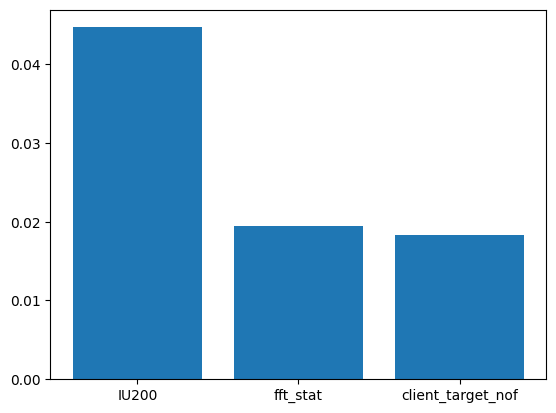

In [154]:
plt.bar(df_my_res.name, df_my_res.score-0.6)

Параметры из таблицы FFT дают большой прирост качества, посмотрим на feature importance для модели на этих данных

<AxesSubplot: xlabel='feature'>

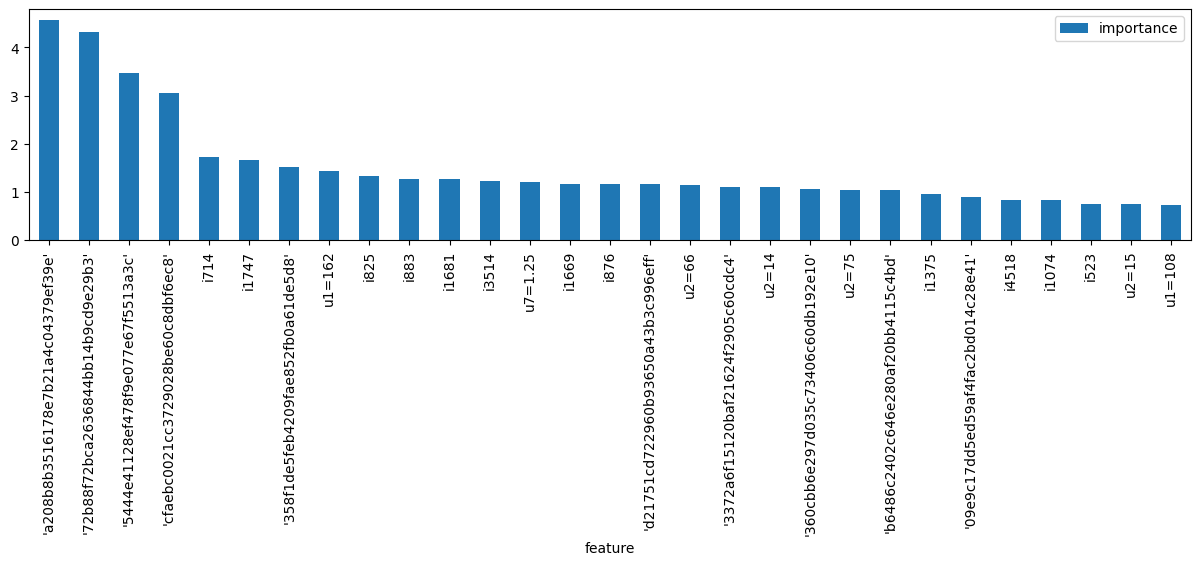

In [157]:
if hasattr(model, 'coef_'): 
    df_importances = sorted(zip(IU200.columns, model.coef_.ravel()), key=lambda tpl: tpl[1], reverse=True) 
else: 
    df_importances= sorted(zip(IU200.columns, model.feature_importances_), key=lambda tpl: tpl[1], reverse=True) 
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])[1:30]
df_importances = df_importances.set_index('feature') 
df_importances.plot(kind='bar', figsize=(15, 3)) 
# df_importances

видно что они действительно повлияли на результат, так что добавим их в наши данные 

In [15]:
data_all = IU200
client_target_nof = (pd.read_csv('client_target_nof.tsv')).drop('Unnamed: 0', axis = 1)
client_target_nof = client_target_nof.drop(['RETRO_DT', 'TARGET'], axis = 1).merge(data_all, on= 'CLIENT_ID', how='right').fillna(0)
client_target_nof.head(2)
model = cb_fit_predict(client_target_nof,'client_target_nof', 1500, 0.02,5) 

Качество стало лучше, но мы поменяли глубину, так что посмотрим на feature importance

In [16]:
if hasattr(model, 'coef_'): 
    df_importances = sorted(zip(client_target_nof.columns.drop('TARGET'), model.coef_.ravel()), key=lambda tpl: tpl[1], reverse=True) 
else: 
    df_importances= sorted(zip(client_target_nof.columns.drop('TARGET'), model.feature_importances_), key=lambda tpl: tpl[1], reverse=True) 
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
print("Feature importance количества друзей:")
df_importances[df_importances['feature'] == 'number_of_friends'].importance

Feature importance количества друзей:


190    0.092362
Name: importance, dtype: float64

Получается этот признак имеет смысл оставить

In [17]:
data_all=client_target_nof

In [18]:
fft_stat = (pd.read_csv('fft_stat.tsv')).drop('Unnamed: 0', axis = 1)
fft_stat = data_all.merge(fft_stat, on= 'CLIENT_ID', how='left').fillna(0)
fft_stat.head(2)
model = cb_fit_predict(fft_stat,'data_all_fft_stat', 1500, 0.02,5) 

In [301]:
df_my_res = pd.read_csv('res_all.csv')
df_my_res[-3:]

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
10,CatBoost,0.651665,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
11,CatBoost,0.645849,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
12,CatBoost,0.646293,data_all_fft_stat,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5


качество улучшилось, но вошли ли новые данные в топ feature importance

<AxesSubplot: xlabel='feature'>

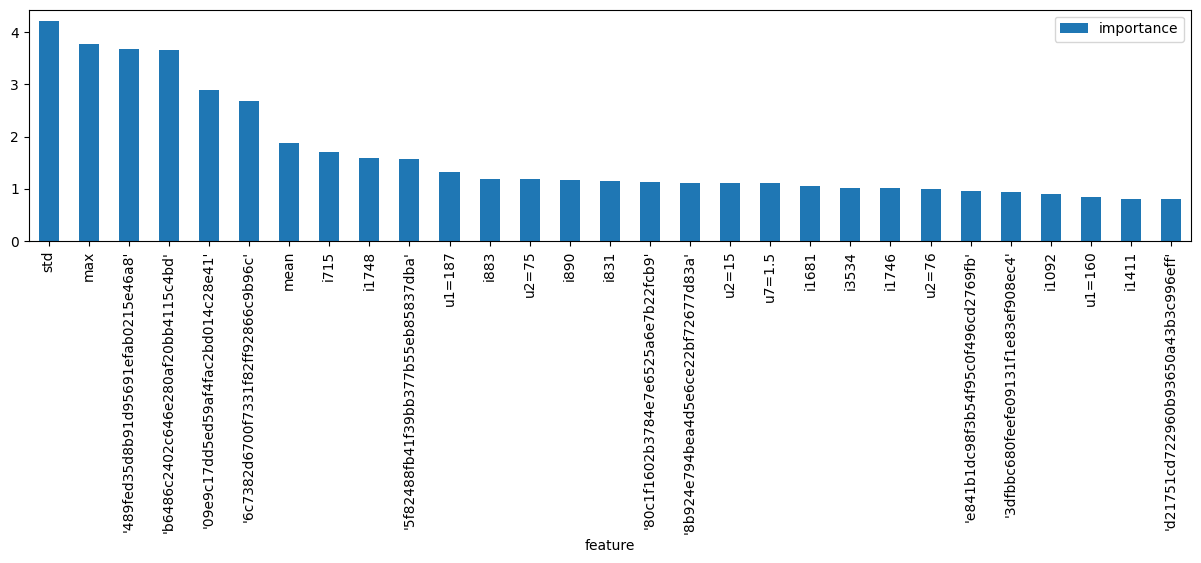

In [308]:
if hasattr(model, 'coef_'): 
    df_importances = sorted(zip(fft_stat.columns.drop('TARGET'), model.coef_.ravel()), key=lambda tpl: tpl[1], reverse=True) 
else: 
    df_importances= sorted(zip(fft_stat.columns.drop('TARGET'), model.feature_importances_), key=lambda tpl: tpl[1], reverse=True) 
imp = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])[1:30]
df_importances = df_importances.set_index('feature') 
df_importances.plot(kind='bar', figsize=(15, 3)) 

очевидно сильно повлияло, попробуем увеличить количество итераций

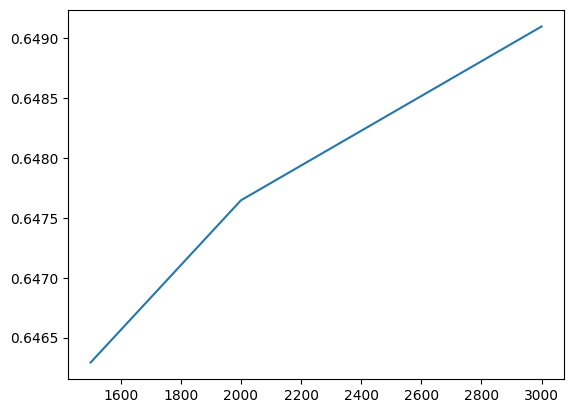

In [317]:
# Поменяем количество итераций:
for i in [1500, 2000, 3000]:
    model = cb_fit_predict(fft_stat,'d_all_fft_stat', i, 0.02,5)  
df_my_res
plt.plot(df_my_res['iterations'][-3:],df_my_res['score'][-3:])

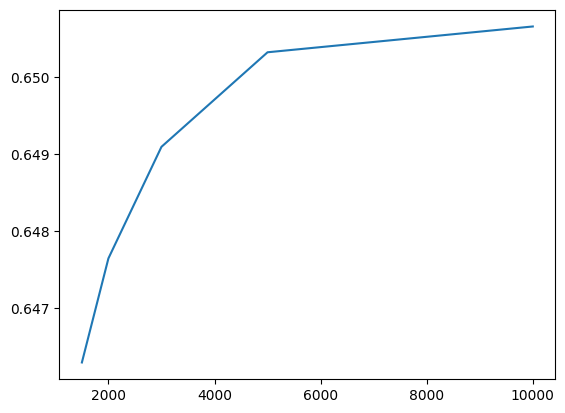

In [318]:
for i in [5000, 10000]:
    model = cb_fit_predict(fft_stat,'d_all_fft_stat', i, 0.02,5)  
df_my_res
plt.plot(df_my_res['iterations'][-5:],df_my_res['score'][-5:])

загрузим результат при 3000 -> на AllCups - .648

In [19]:
data_all = fft_stat

In [327]:
df_my_res[-4:]

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
15,CatBoost,0.649097,d_all_fft_stat,AUC,Plain,3000,5,MultiClass,0.02,Cosine,CatBoost_3000_0.02_5
16,CatBoost,0.650326,d_all_fft_stat,AUC,Plain,5000,5,MultiClass,0.02,Cosine,CatBoost_5000_0.02_5
17,CatBoost,0.650662,d_all_fft_stat,AUC,Plain,10000,5,MultiClass,0.02,Cosine,CatBoost_10000_0.02_5
18,CatBoost,0.648997,IU_norm,AUC,Plain,3000,5,MultiClass,0.02,Cosine,CatBoost_3000_0.02_5


Добавим нормализованные признаки из fft

In [339]:
IU200_norm = (pd.read_csv('top_200_normal_i_and_u_ID.csv') )
print(IU200_norm.head())
cols = ['CLIENT_ID']+[f'norm_{i}' for i in IU200_norm.columns]
IU200_norm = (pd.read_csv('top_200_normal_i_and_u_ID.csv', names = cols))

IU200_norm = data_all.merge(IU200_norm, on= 'CLIENT_ID', how='left').fillna(0)
IU200_norm.head(2)
model = cb_fit_predict(IU200_norm,'IU_norm', 5000, 0.02,5) 

   CLIENT_ID     i1048     i1056     i1060     i1065  i1074     i1092  \
0       7150  0.000000  0.000684  0.000000  0.000000    0.0  0.000171   
1       7154  0.012204  0.035543  0.011898  0.001605    0.0  0.000000   
2       7156  0.003814  0.002962  0.000000  0.000000    0.0  0.007541   
3      26966  0.000000  0.000911  0.000595  0.000000    0.0  0.001371   
4      26993  0.020595  0.034860  0.000000  0.000000    0.0  0.002399   

      i1130     i1139     i1147  ...      u6=2      u7=0       u7=1    u7=1.1  \
0  0.000000  0.000000  0.000000  ...  0.078028  0.052844   0.000000  0.000000   
1  0.013141  0.000000  0.001142  ...  0.136270  0.194540   1.428007  0.000000   
2  0.012484  0.000000  0.027397  ...  0.000000  0.000000   0.000000  0.000000   
3  0.000657  0.000000  0.000000  ...  0.024955  0.030748   0.001913  0.000000   
4  0.116294  0.003601  0.000000  ...  0.032390  0.360320  13.542150  1.179272   

    u7=1.25    u7=1.5      u7=2      u7=3      u8=0    u8=0.1  
0  0.00000

/tmp/ipykernel_11198/2326099738.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  IU200_norm = (pd.read_csv('top_200_normal_i_and_u_ID.csv', names = cols))


In [342]:
df_my_res[-2:]

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
19,CatBoost,0.648223,IU_norm,AUC,Plain,3000,5,MultiClass,0.02,Cosine,CatBoost_3000_0.02_5
20,CatBoost,0.649676,IU_norm,AUC,Plain,5000,5,MultiClass,0.02,Cosine,CatBoost_5000_0.02_5


Загрузим при загрузим результат при 5000 -> на AllCups - .6508

<AxesSubplot: xlabel='feature'>

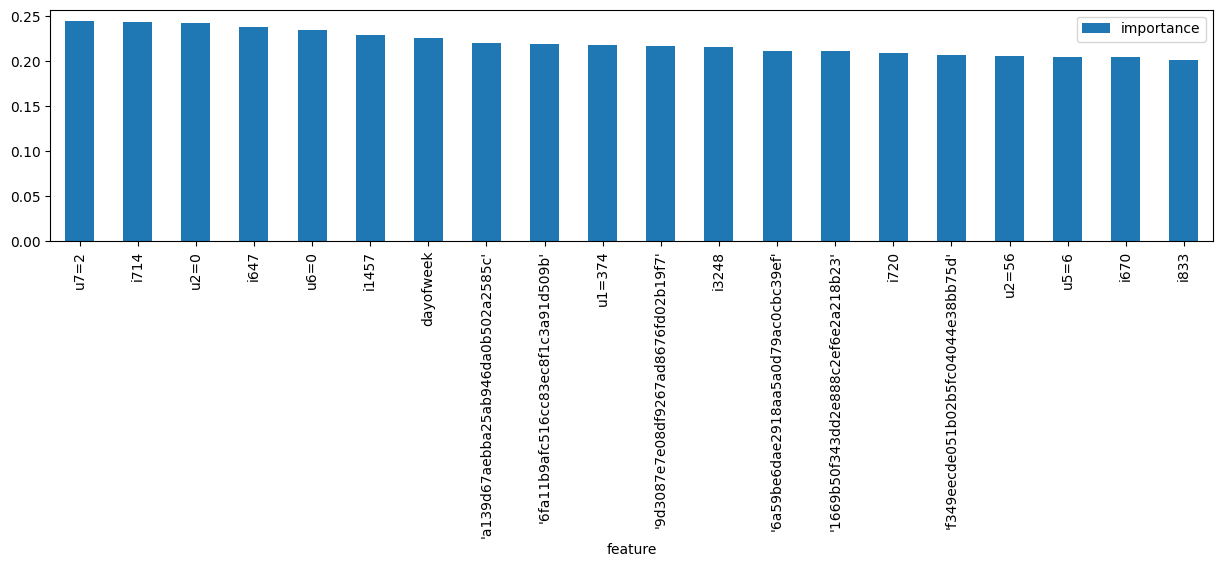

In [349]:
if hasattr(model, 'coef_'): 
    df_importances = sorted(zip(fft_stat.columns.drop('TARGET'), model.coef_.ravel()), key=lambda tpl: tpl[1], reverse=True) 
else: 
    df_importances= sorted(zip(fft_stat.columns.drop('TARGET'), model.feature_importances_), key=lambda tpl: tpl[1], reverse=True) 
imp = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])[70:90]
df_importances = df_importances.set_index('feature') 
df_importances.plot(kind='bar', figsize=(15, 3)) 

Несмотря на то что качетво улучшилось, они не оказалиь в топе feature importance, так что мы не будем их использовать

In [56]:
fft_friend = (pd.read_csv('mean_by_friends.tsv')).drop('Unnamed: 0', axis = 1)
fft_friend = data_all.merge(fft_friend, on= 'CLIENT_ID', how='left').fillna(0)
fft_friend.head(2)
model = cb_fit_predict(fft_friend,'fft_friend', 1500, 0.02,5) 

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=417]="u8=0": Cannot convert 'b'u8=0'' to float

МЕТРИКИ

In [356]:
model = cb_fit_predict(data_all,'data_all_LL', 3000, 0.02,5, loss_function = 'Logloss') 

In [357]:
met = ['CrossEntropy'] 
for i in met:
    cb_fit_predict(data_all,f'data_all_{i}', 3000, 0.02,5, loss_function = i) 

In [371]:
df_my_res[-2:]

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
26,CatBoost,0.648509,data_all_CrossEntropy,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5
27,CatBoost,0.648938,data_all_MultiClassOneVsAll,AUC,Plain,3000,5,MultiClassOneVsAll,0.02,Cosine,CatBoost_3000_0.02_5


In [ ]:
met = ['QueryAUC'] 
for i in met:
    cb_fit_predict(data_all,f'data_all_{i}', 3000, 0.02,5, loss_function = i) 

In [51]:
df_my_res[-2:]

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
26,CatBoost,0.648509,data_all_CrossEntropy,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5
27,CatBoost,0.648938,data_all_MultiClassOneVsAll,AUC,Plain,3000,5,MultiClassOneVsAll,0.02,Cosine,CatBoost_3000_0.02_5


In [53]:
sorted_df = df_my_res.sort_values(by='score')
sorted_df

,mod,score,name,dfeval_metric,boosting_type,iterations,depth,loss_function,learning_rate,score_function,csv_model
8,CatBoost,0.645437,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
11,CatBoost,0.645849,client_target_nof,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
12,CatBoost,0.646293,data_all_fft_stat,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
13,CatBoost,0.646293,d_all_fft_stat,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
20,CatBoost,0.646293,data_all_fft_stat,AUC,Plain,1500,5,MultiClass,0.02,Cosine,CatBoost_1500_0.02_5
14,CatBoost,0.647646,d_all_fft_stat,AUC,Plain,2000,5,MultiClass,0.02,Cosine,CatBoost_2000_0.02_5
19,CatBoost,0.648223,IU_norm,AUC,Plain,3000,5,MultiClass,0.02,Cosine,CatBoost_3000_0.02_5
25,CatBoost,0.648509,data_all_CrossEntropy,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5
24,CatBoost,0.648509,data_all_LL,AUC,Plain,3000,5,Logloss,0.02,Cosine,CatBoost_3000_0.02_5
23,CatBoost,0.648509,data_all,AUC,Plain,3000,5,CrossEntropy,0.02,Cosine,CatBoost_3000_0.02_5


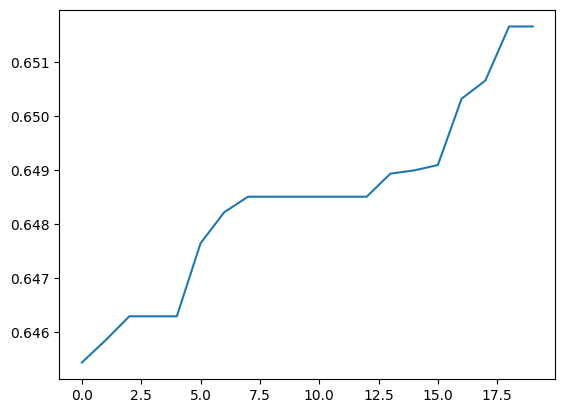

In [55]:
plt.plot(range(len(sorted_df)), sorted_df['score'])

МОДЕЛИ

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))


In [30]:
from sklearn.linear_model import LogisticRegression
train = data_all[data_all.TARGET != 'test']
test = data_all[data_all.TARGET == 'test'].drop(['TARGET'], axis =1)
X_train = train.drop(['TARGET'], axis = 1)
Y_train = pd.DataFrame(train['TARGET'])
x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=1337)

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict_proba(x_validation.values)
roc = roc_auc_score(y_validation, pred[:, 1])

/home/jupyter-admin/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter-admin/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
roc

0.5618680116781805

In [39]:
df_mod = pd.DataFrame(columns = ['name', 'score'])

In [40]:
df_mod.loc[len(df_mod)] = ['LogisticRegression', roc]
df_mod.loc[len(df_mod)] = ['CatBoost', 0.6508]
df_mod.to_csv('df_mod.csv', index = False)

In [47]:
train = data_all[data_all.TARGET != 'test']
test = data_all[data_all.TARGET == 'test'].drop(['TARGET'], axis =1)
X_train = train.drop(['TARGET'], axis = 1)
Y_train = pd.DataFrame(train['TARGET'])
    
    
x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=1337)
x, x_v, y, y_v = train_test_split(x_train, y_train, test_size=0.1, random_state=1337)
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 
model.fit(x.values,y.values,eval_set=(x_v.values,y_v.values), verbose = False)
scores = cross_val_score(model, x_train, y_train, cv=5)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, x_train, y_train, cv=kfold )
pred = model.predict(x_validation.values)
roc = roc_auc_score(y_validation, pred[:, 1])


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['0' '1']

In [48]:
df_mod.loc[len(df_mod)] = ['XGB', 0.5908]

<BarContainer object of 3 artists>

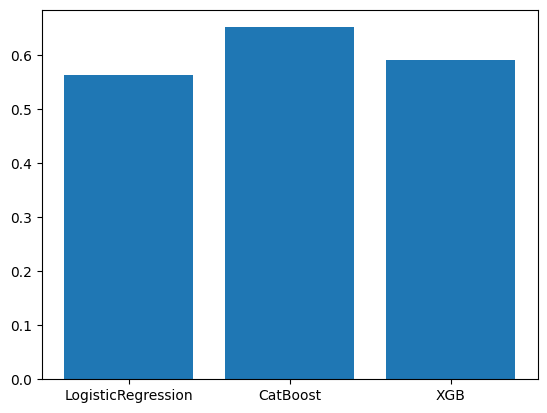

In [49]:
plt.bar(df_mod['name'], df_mod['score'])

А теперь выделим бесполезные столбцы

In [163]:
useless = []